ppt : https://docs.google.com/presentation/d/1z8B_p4eeJp3Bj0KCYegR4htqFa68HtpokeI2WOprw44/edit#slide=id.g22b6ed522ab_1_32

In [166]:
url = r'https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv'

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

In [168]:
airbnb=pd.read_csv(url,usecols=['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])

In [169]:
airbnb.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [170]:
airbnb.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [171]:
catDF = airbnb.select_dtypes(exclude='number')
numDF = airbnb.select_dtypes(include='number')

In [172]:
print (f'Categorical features are {list(catDF.columns)}\n')
print (f'Numerical features are {list(numDF.columns)}')

Categorical features are ['neighbourhood_group', 'room_type']

Numerical features are ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


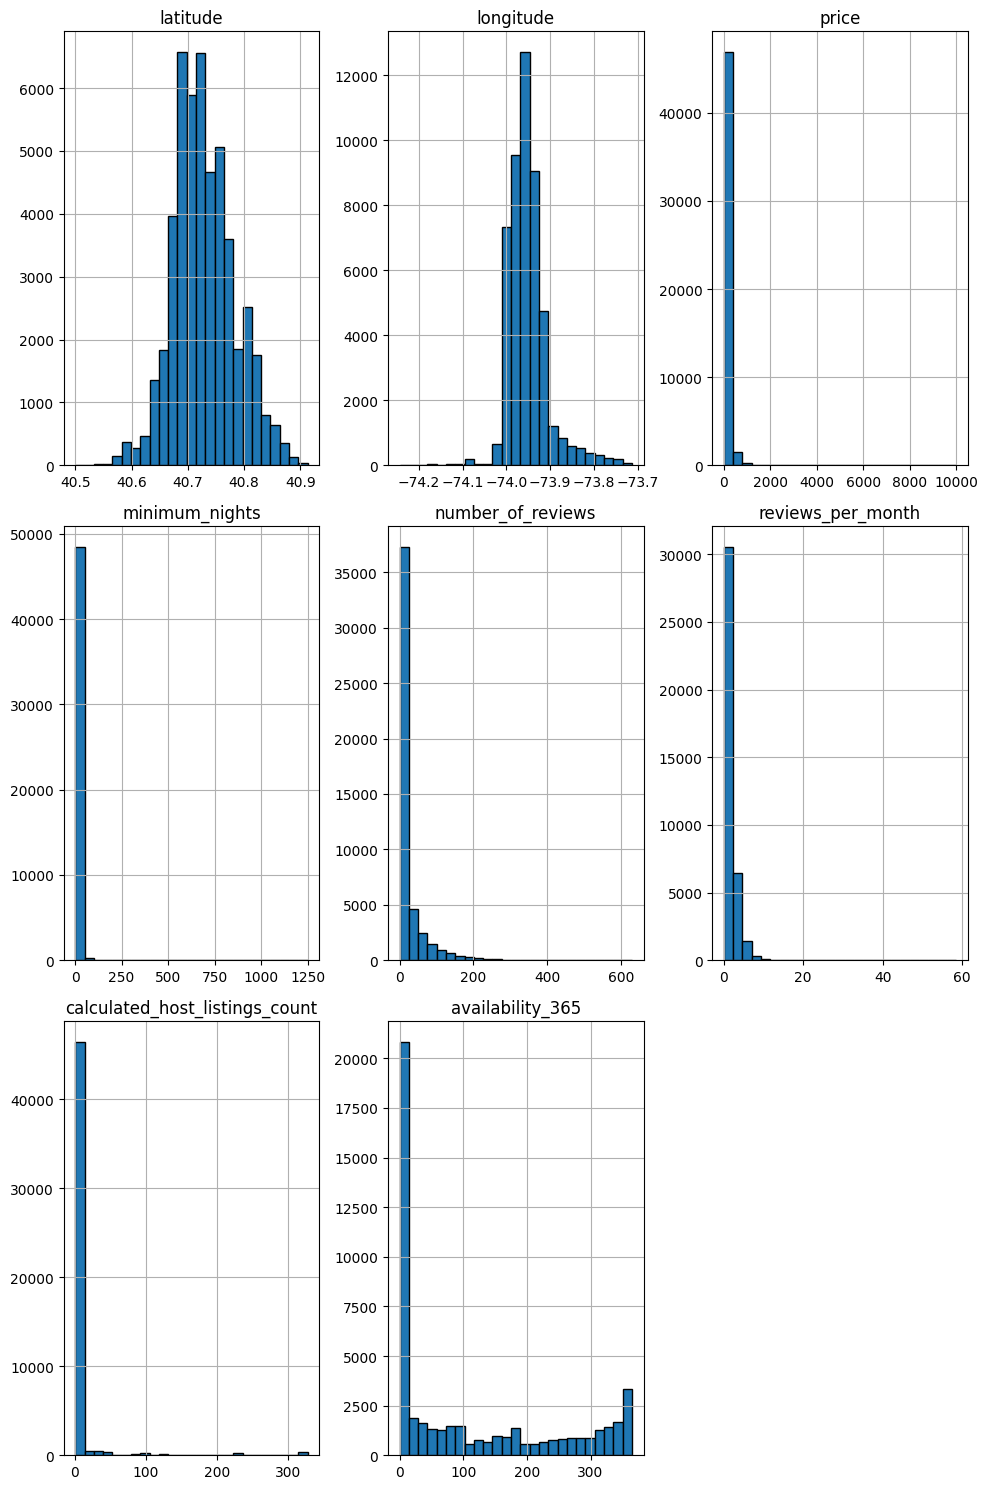

In [173]:
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(10, 15), layout=(-1, 3),
edgecolor="black")
plt.tight_layout();

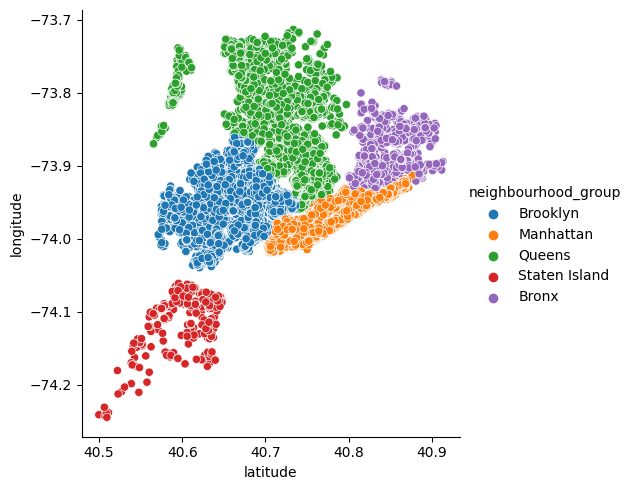

In [174]:
sns.relplot(data=airbnb,kind='scatter',x='latitude',y='longitude',hue='neighbourhood_group')
plt.show()

In [175]:
df_group=airbnb.groupby(by=['neighbourhood_group'],as_index=False).agg(total_price=pd.NamedAgg(column='price',aggfunc='sum'),total_count=pd.NamedAgg(column='price',aggfunc='count'))
df_group['average_rental']=(df_group['total_price']/df_group['total_count']).round(2)
df_group.drop('total_price',axis=1,inplace=True)

In [176]:
df_group.sort_values('average_rental',ascending=False)

,neighbourhood_group,total_count,average_rental
2,Manhattan,21661,196.88
1,Brooklyn,20104,124.38
4,Staten Island,373,114.81
3,Queens,5666,99.52
0,Bronx,1091,87.50


In [177]:
df_group=airbnb.groupby(by=['room_type'],as_index=False).agg(total_price=pd.NamedAgg(column='price',aggfunc='sum'),total_count=pd.NamedAgg(column='price',aggfunc='count'))
df_group['average_rental']=(df_group['total_price']/df_group['total_count']).round(2)
df_group.drop('total_price',axis=1,inplace=True)
df_group.sort_values('average_rental',ascending=False)

,room_type,total_count,average_rental
0,Entire home/apt,25409,211.79
1,Private room,22326,89.78
2,Shared room,1160,70.13


In [178]:
airbnb.groupby('neighbourhood_group').mean()

C:\Users\John\AppData\Local\Temp\ipykernel_10528\3416971172.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airbnb.groupby('neighbourhood_group').mean()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,
Bronx,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


In [179]:
airbnb['neighbourhood_group'].value_counts(ascending=False)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [180]:
airbnb['reviews_per_month']=airbnb['reviews_per_month'].fillna(0)

In [181]:
#TODO : groupby on location to calculate the avg price

# Question 1
What is the most frequent observation (mode) for the column 'neighbourhood_group'?

    Split the      data
    Split your data in train/val/test sets, with 60%/20%/20% (or 80/20) distribution.
    Use      Scikit-Learn for that (the train_test_split function) and set the seed to      42.
    Make sure that the target value ('price') is not in your dataframe.


In [182]:
from sklearn.model_selection import train_test_split
airbnb_train_full, airbnb_test = train_test_split(airbnb, test_size=0.2, random_state=42)
airbnb_train, airbnb_val = train_test_split(airbnb_train_full, test_size=0.33, random_state=42)
y_train = airbnb_train['price'].values
y_val = airbnb_val['price'].values

#Question 2

Create the correlation matrix for the numerical features of your train dataset.

In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [183]:
numerical=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365']
categorical=['neighbourhood_group','room_type'] # OHE


C:\Users\John\AppData\Local\Temp\ipykernel_10528\3588963122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=airbnb_train.corr())


<Axes: >

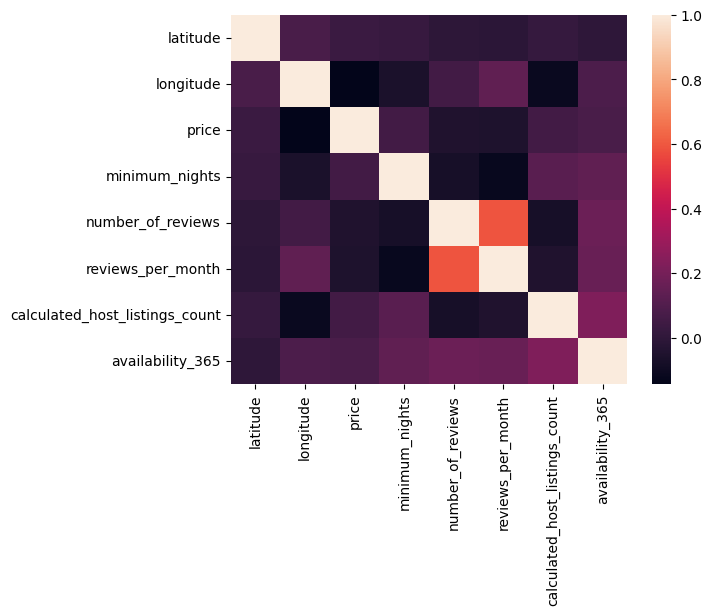

In [184]:
sns.heatmap(data=airbnb_train.corr())

In [185]:
airbnb_train.corr()

C:\Users\John\AppData\Local\Temp\ipykernel_10528\2458148580.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_train.corr()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.076564,0.032604,0.023254,-0.009476,-0.012338,0.020622,-0.005611
longitude,0.076564,1.000000,-0.144614,-0.063291,0.054183,0.137860,-0.117461,0.084543
price,0.032604,-0.144614,1.000000,0.052144,-0.047562,-0.053993,0.053671,0.078917
minimum_nights,0.023254,-0.063291,0.052144,1.000000,-0.073806,-0.119621,0.120404,0.140095
number_of_reviews,-0.009476,0.054183,-0.047562,-0.073806,1.000000,0.591769,-0.073796,0.169187
reviews_per_month,-0.012338,0.137860,-0.053993,-0.119621,0.591769,1.000000,-0.050630,0.162559
calculated_host_listings_count,0.020622,-0.117461,0.053671,0.120404,-0.073796,-0.050630,1.000000,0.226220
availability_365,-0.005611,0.084543,0.078917,0.140095,0.169187,0.162559,0.226220,1.000000


In [186]:
#Two features that have the biggest correlation in this dataset are number_of_reviews and number_of_reviews

# Make price binary

We need to turn the price variable from numeric to binary.

Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [187]:
# generate a dataframe for training which has price and binary representation of price
above_average=(y_train>=152).astype('int')
df_y_train=pd.DataFrame({'price_actual': y_train, 'price_binary': above_average})

In [188]:
df_y_train.head(14)

,price_actual,price_binary
0,99,0
1,125,0
2,95,0
3,149,0
4,158,1
5,120,0
6,40,0
7,90,0
8,225,1
9,70,0


In [189]:
# generate a datafrmae for test which has price and binary representation of price
above_average=(y_val>=152).astype('int')
df_y_val=pd.DataFrame({'price_actual':y_val,'price_binary':above_average})

In [190]:
df_y_val

,price_actual,price_binary
0,65,0
1,89,0
2,200,1
3,120,0
4,748,1
...,...,...
12904,110,0
12905,289,1
12906,70,0
12907,199,1


# Question 3

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.

Which of these two variables has a bigger score?

Round it to 2 decimal digits using round(score, 2)

In [191]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_y_train['price_binary'])
df_mi = airbnb_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
room_type,0.144156
neighbourhood_group,0.045455


In [192]:
print(f"The variable with the bigger score is room_type with a value of {round(df_mi['MI']['room_type'],2)}")

The variable with the bigger score is room_type with a value of 0.14


In [193]:
airbnb['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

# Question 4

Now let's train a logistic regression

Remember that we have two categorical variables in the data. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [194]:
from sklearn.feature_extraction import DictVectorizer
train_dict = airbnb_train[categorical + numerical].to_dict(orient='records')

In [195]:
train_dict[0]

{'neighbourhood_group': 'Queens',
 'room_type': 'Entire home/apt',
 'latitude': 40.74496,
 'longitude': -73.89534,
 'minimum_nights': 1,
 'number_of_reviews': 118,
 'reviews_per_month': 6.0,
 'calculated_host_listings_count': 1,
 'availability_365': 320}

In [196]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
feature_names=dv.feature_names_

In [197]:
feature_names

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [198]:
X_train = dv.transform(train_dict)
X_train.shape

(26207, 15)

In [199]:
# create a regression model using the training set with the binary price attribute
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=42, C=1.0)
model.fit(X_train, df_y_train['price_binary'].to_numpy())

c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [200]:
val_dict = airbnb_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [201]:
y_pred = model.predict_proba(X_val)[:,1]

In [202]:
from sklearn.metrics import accuracy_score
price_binary=df_y_val['price_binary'].to_numpy()
accuracy_score=accuracy_score(price_binary,y_pred >=152)
accuracy_score

0.695328840343946

In [203]:
print(f"The accuracy on the validation dataset is {round(accuracy_score,2)}")

The accuracy on the validation dataset is 0.7


# Question 5

We have 9 features: 7 numerical features and 2 categorical.

Let's find the least useful one using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of the following feature has the smallest difference?

neighbourhood_group

room_type

number_of_reviews

reviews_per_month

note: the difference doesn't have to be positive

In [204]:
airbnb_train.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [205]:
#RFE
#get feature coefficients/importance
dict(zip(airbnb_train.columns, abs(model.coef_[0])))

# the following are low coefficients : 'neighbourhood_group','latitude','minimum_nights'

# data should be standardized first before comparing

{'neighbourhood_group': 0.003147508597882474,
 'latitude': 0.004356507035289916,
 'longitude': 0.21141452175107128,
 'room_type': 0.08611578902502665,
 'price': 0.010387765631918155,
 'minimum_nights': 0.359023704527214,
 'number_of_reviews': 0.07114875240146157,
 'reviews_per_month': 1.1482578911910384,
 'calculated_host_listings_count': 0.7479350835787132,
 'availability_365': 0.11488350141274219}

In [206]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=LogisticRegression(),verbose=1)

In [207]:
rfe.fit(X_train,df_y_train['price_binary'].to_numpy())

Fitting estimator with 15 features.


c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 14 features.


c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitting estimator with 13 features.
Fitting estimator with 12 features.


c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 11 features.


c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitting estimator with 10 features.
Fitting estimator with 9 features.


c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 8 features.


RFE(estimator=LogisticRegression(), verbose=1)

In [208]:

#get  the feature RFE results of all features
list(zip(feature_names,rfe.support_))

[('availability_365', False),
 ('calculated_host_listings_count', False),
 ('latitude', True),
 ('longitude', True),
 ('minimum_nights', False),
 ('neighbourhood_group=Bronx', False),
 ('neighbourhood_group=Brooklyn', False),
 ('neighbourhood_group=Manhattan', True),
 ('neighbourhood_group=Queens', False),
 ('neighbourhood_group=Staten Island', True),
 ('number_of_reviews', False),
 ('reviews_per_month', False),
 ('room_type=Entire home/apt', True),
 ('room_type=Private room', True),
 ('room_type=Shared room', True)]

In [209]:

#higher ranks mean feature was dropped earlier on
# so features with rank 1 were kept till last
list(zip(feature_names,rfe.ranking_))

[('availability_365', 9),
 ('calculated_host_listings_count', 6),
 ('latitude', 1),
 ('longitude', 1),
 ('minimum_nights', 7),
 ('neighbourhood_group=Bronx', 2),
 ('neighbourhood_group=Brooklyn', 5),
 ('neighbourhood_group=Manhattan', 1),
 ('neighbourhood_group=Queens', 3),
 ('neighbourhood_group=Staten Island', 1),
 ('number_of_reviews', 8),
 ('reviews_per_month', 4),
 ('room_type=Entire home/apt', 1),
 ('room_type=Private room', 1),
 ('room_type=Shared room', 1)]

In [210]:

#features that were kept till last
[x for x,y in list(zip(feature_names,rfe.support_[rfe.support_==True]))]

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn']

In [211]:
# TODO : accuracy scores calculation : Avra loop solution and accuracy solution

In [212]:
# ROC AUC curve to be done

In [220]:
from sklearn.ensemble import RandomForestClassifier
A=X_train
B=y_train
rf=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=42)
rf.fit(A,B)

RandomForestClassifier(max_depth=5, random_state=42)

In [221]:
importances = rf.feature_importances_
importances
# Print the feature importances with the corresponding column names
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

availability_365: 0.03983212614361368
calculated_host_listings_count: 0.07418058778179805
latitude: 0.09393743671851555
longitude: 0.12225579812808851
minimum_nights: 0.03455788931888053
neighbourhood_group=Bronx: 0.0034031724878905954
neighbourhood_group=Brooklyn: 0.013285567831467613
neighbourhood_group=Manhattan: 0.05900882152925493
neighbourhood_group=Queens: 0.009894797120188158
neighbourhood_group=Staten Island: 0.0021478977762481822
number_of_reviews: 0.028073466310252825
reviews_per_month: 0.025645868387117764
room_type=Entire home/apt: 0.2629748122576293
room_type=Private room: 0.20121330570419943
room_type=Shared room: 0.029588452504854847


In [222]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)

                              feature  importance
12          room_type=Entire home/apt    0.262975
13             room_type=Private room    0.201213
3                           longitude    0.122256
2                            latitude    0.093937
1      calculated_host_listings_count    0.074181
7       neighbourhood_group=Manhattan    0.059009
0                    availability_365    0.039832
4                      minimum_nights    0.034558
14              room_type=Shared room    0.029588
10                  number_of_reviews    0.028073
11                  reviews_per_month    0.025646
6        neighbourhood_group=Brooklyn    0.013286
8          neighbourhood_group=Queens    0.009895
5           neighbourhood_group=Bronx    0.003403
9   neighbourhood_group=Staten Island    0.002148
